In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import confusion_matrix, classification_report, f1_score


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/telecom_users.csv", delimiter=",")
print(df.shape)
df.head()

(5986, 22)


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [5]:
df.columns.unique()

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

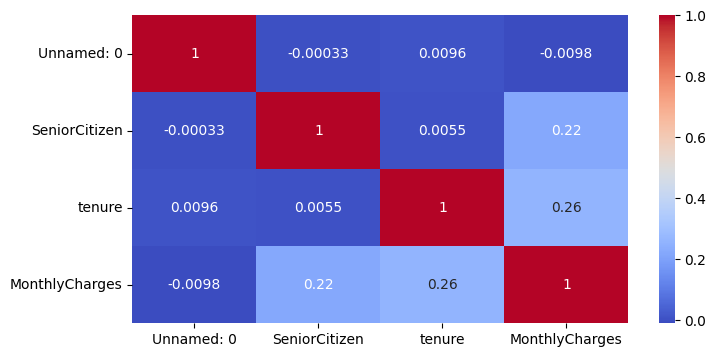

In [20]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

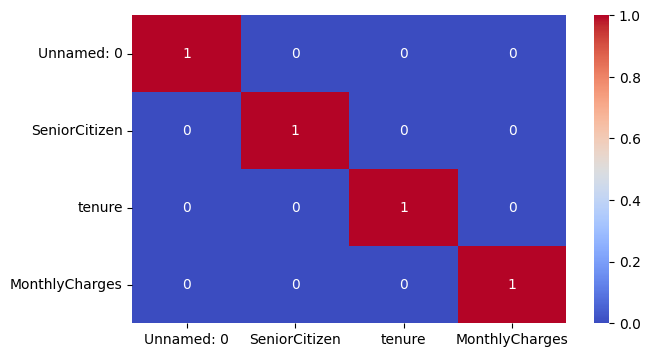

In [31]:
r = df.corr()
r[abs(r) <= 0.75] = 0
plt.figure(figsize=(7, 4))
sns.heatmap(r, annot=True, cmap='coolwarm');

In [38]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn']),
                                                    df['Churn'],
                                                    test_size=0.3,
                                                    random_state=42)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4190, 21), (1796, 21), (4190,), (1796,))

In [41]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()
categorical_features, numeric_features

(['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges'],
 ['Unnamed: 0', 'SeniorCitizen', 'tenure', 'MonthlyCharges'])

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

In [43]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available').set_output(transform="pandas")),
                                          ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore").set_output(transform="pandas"))
                                          ])
categorical_transformer

Pipeline(steps=[('cat_imputer',
                 SimpleImputer(fill_value='Not Available',
                               strategy='constant')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [44]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5).set_output(transform="pandas")),
                                      ("scaler", StandardScaler().set_output(transform="pandas"))
                                      ])

numeric_transformer

Pipeline(steps=[('knn_imputer', KNNImputer()), ('scaler', StandardScaler())])

In [45]:
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer,
                                                       numeric_features),
                                               ("cat", categorical_transformer,
                                                       categorical_features)
                                               ]).set_output(transform="pandas")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Unnamed: 0', 'SeniorCitizen', 'tenure',
                                  'MonthlyCharges']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='Not '
                                                                           'Available',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['customerID', 'gender', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod',
                                  'TotalCharges'])])

In [46]:
pipeline_xgb = Pipeline([("pre_process", preprocessor),
                         ("model", xgb)])
pipeline_xgb

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0',
                                                   'SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Not '
                                                                                            'Available',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [66]:
pipeline_xgb.fit(X_train, y_train)
y_pred = pipeline_xgb.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
scores = {}
scores['xgb'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

In [70]:
feature_names = pipeline_xgb['pre_process'].get_feature_names_out()
feature_names

array(['num__Unnamed: 0', 'num__SeniorCitizen', 'num__tenure', ...,
       'cat__TotalCharges_996.85', 'cat__TotalCharges_998.1',
       'cat__TotalCharges_999.45'], dtype=object)

In [71]:
xgb_model = pipeline_xgb['model']
xgb_model.feature_importances_

array([0.00984459, 0.01001517, 0.01528132, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [72]:
xgb_importances = pd.DataFrame(
    {"feature": feature_names, "importance": np.round(xgb_model.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
xgb_importances.head(20)

,importance
feature,
cat__Contract_Month-to-month,0.391
cat__InternetService_Fiber optic,0.185
cat__PhoneService_No,0.033
cat__TechSupport_No,0.026
cat__StreamingMovies_Yes,0.025
cat__Contract_Two year,0.024
cat__Contract_One year,0.023
cat__OnlineSecurity_No,0.020
cat__MultipleLines_No,0.016


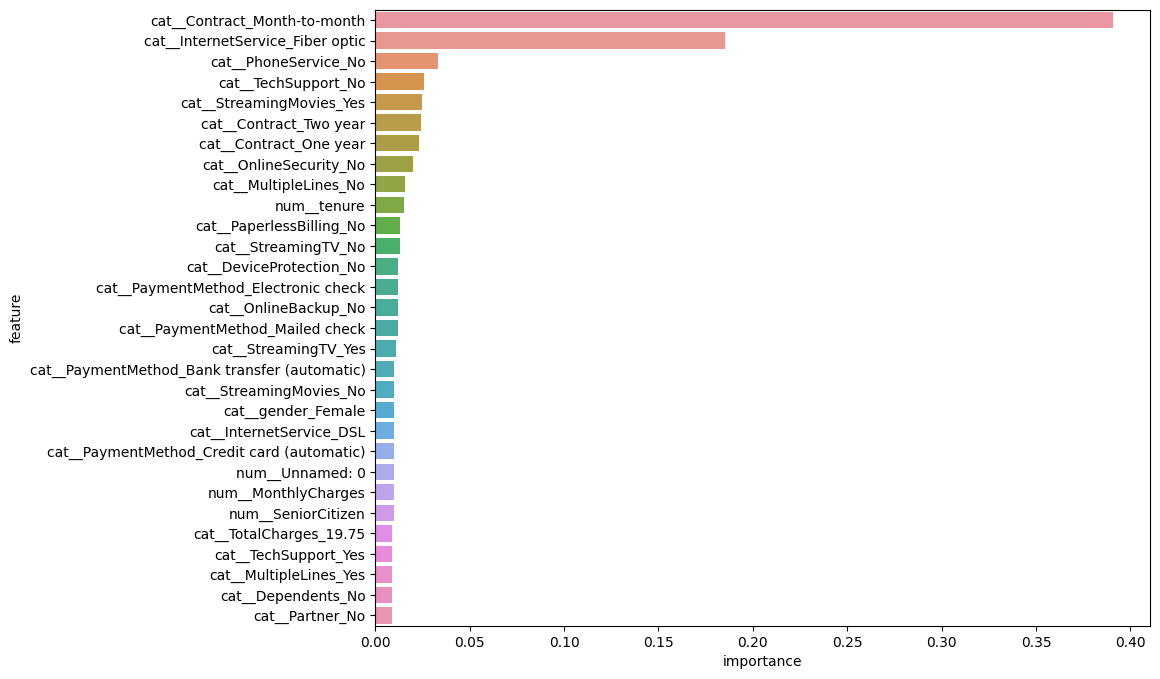

In [73]:
plt.figure(figsize=(10, 8))
sns.barplot(y=xgb_importances.head(30).index,
            x=xgb_importances.head(30).importance);

In [75]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=8d4ddf39a24ed2b02a49c79d98c0a4443965d617319102bac2722293eddf19ff
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [76]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 968.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=4d80ade293ab90b1c3c306523bd4172355fa3a8fbca1429b5472ffe55b9e3ed5
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [77]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 1.4 MB/s eta 0:00:00


In [78]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpquid_fk9
  JVM stdout: /tmp/tmpquid_fk9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpquid_fk9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,19 hours and 58 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_qtddky
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [81]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1187,5369,9860-LISIZ,Female,0,No,No,34,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,673.2,0
5080,1329,3910-MRQOY,Female,0,Yes,No,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.40,1496.45,0
5752,3457,8566-YPRGL,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.50,19.5,0
1030,765,4718-DHSMV,Female,0,No,No,11,No,No phone service,DSL,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,35.80,363.15,0
5780,6776,6120-RJKLU,Female,1,Yes,No,62,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.95,4819.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,714,4312-KFRXN,Male,0,Yes,No,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,1710.9,0
5191,1353,7073-QETQY,Male,0,Yes,Yes,66,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.35,1359.5,0
5226,823,0295-QVKPB,Male,0,No,No,5,Yes,No,DSL,...,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),63.95,318.1,0
5390,2738,2351-BKRZW,Female,0,Yes,Yes,43,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),75.20,3254.35,0


In [83]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data = h2o.H2OFrame.from_python(train_data)
train_data['Churn'] = train_data['Churn'].asfactor()
train_data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5369,9860-LISIZ,Female,0,No,No,34,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,673.2,0
1329,3910-MRQOY,Female,0,Yes,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.4,1496.45,0
3457,8566-YPRGL,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.5,19.5,0
765,4718-DHSMV,Female,0,No,No,11,No,No phone service,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,35.8,363.15,0
6776,6120-RJKLU,Female,1,Yes,No,62,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.95,4819.75,0
443,2937-FTHUR,Female,0,No,Yes,18,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,No,Electronic check,64.8,1166.7,0
1636,1371-OJCEK,Female,0,No,No,48,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),24.35,1133.7,0
1068,5536-RTPWK,Male,0,Yes,No,49,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),99.05,4853.75,1
1183,0887-WBJVH,Female,0,Yes,No,53,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,93.45,4872.2,0
835,4250-WAROZ,Male,1,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,93.25,5774.55,0


In [84]:
aml = H2OAutoML(max_models=30, # hard total models experimented limit
                max_runtime_secs=300, # try to run as many models in 5 mins
                max_runtime_secs_per_model=30, # max training time for a model <= 30 s else move to next model
                seed=1)
aml.train(x=X_train.columns.tolist(), y="Churn", training_frame=train_data)

AutoML progress: |
12:33:32.453: _train param, Dropping bad and constant columns: [customerID]

████
12:33:46.697: _train param, Dropping bad and constant columns: [customerID]

█
12:33:55.216: _train param, Dropping bad and constant columns: [customerID]

███
12:34:06.343: _train param, Dropping bad and constant columns: [customerID]

██
12:34:17.263: _train param, Dropping bad and constant columns: [customerID]

████
12:34:35.673: _train param, Dropping bad and constant columns: [customerID]

█
12:34:43.444: _train param, Dropping bad and constant columns: [customerID]

██
12:34:49.64: _train param, Dropping bad and constant columns: [customerID]

█
12:34:55.218: _train param, Dropping bad and constant columns: [customerID]

█
12:35:02.909: _train param, Dropping bad and constant columns: [customerID]

███
12:35:16.359: _train param, Dropping bad and constant columns: [customerID]

█
12:35:22.97: _train param, Dropping bad and constant columns: [customerID]

█████████████████████████

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20231221_123331


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    38                 38                          14081                  6            12           7.76316       23            27            24.7632

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11877880991222506
RMSE: 0.34464301808135483
LogLoss: 0.37132183203745567
Mean Per-Class Error: 0.203693708751477
AUC: 0.8877777564982021
AUCPR: 0.7439636935002816
Gini: 0.7755555129964042

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36307668701101303
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      2608  458   0.1494   (458.0/3066.0)
1      290   834   0.258    (290.0/1124.0)
Total  2898  1292  0.1785   (748.0/4190.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.363077     0.690397  198
max f2                       0.159371     0.78692   293
max f0point5                 0.501815     0.692324  142
max accuracy                 0.497236     0.829356  144
max precision                0.909202     1         0
max recall                   0.033312     1         377
max specificity              0.909202     1         0
max absolute_mcc             0.363077     0.568538  198
max min_per_class_accuracy   0.310449     0.803979  220
max mean_per_class_accuracy  0.285905     0.810295  231
max tns                      0.909202     3066      0
max fns                      0.909202     1123      0
max fps                      0.0115992    3066      399
max tps                      0.033312     1124      377
max tnr                      0.909202     1         0
max fnr                      0.909202     0.99911   0
max fpr                      0.0115992    1         399
max tpr                      0.033312     1         377

Gains/Lift Table: Avg response rate: 26.83 %, avg score: 26.80 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0107399                   0.845201           3.56208    3.56208            0.955556         0.866772   0.955556                    0.866772            0.0382562       0.0382562                  256.208   256.208            0.0376039
2        0.0200477                   0.822482           3.53659    3.55025            0.948718         0.832393   0.952381                    0.85081             0.0329181       0.0711744                  253.659   255.025            0.0698697
3        0.0300716                   0.795794           3.55025    3.55025            0.952381         0.809041   0.952381                    0.836887            0.0355872       0.106762                   255.025   255.025            0.104805
4        0.0400955                   0.773225           3.55025    3.55025            0.952381         0.784948   0.952381                    0.823902            0.0355872       0.142349                   255.025   255.025            0.139739
5        0.0501193                   0.755825           2.92895    3.42599            0.785714         0.76542    0.919048                  

In [86]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_1_20231221_123331,0.845586,0.41803,0.661959,0.23459,0.368348,0.13568,2942,0.063303,GBM
GBM_grid_1_AutoML_1_20231221_123331_model_2,0.844755,0.419542,0.65407,0.229487,0.368886,0.136077,365,0.028948,GBM
GLM_1_AutoML_1_20231221_123331,0.843921,0.421145,0.652482,0.234946,0.369782,0.136739,1129,0.004835,GLM
GBM_grid_1_AutoML_1_20231221_123331_model_4,0.842161,0.421252,0.658798,0.228611,0.370085,0.136963,872,0.02869,GBM
GBM_grid_1_AutoML_1_20231221_123331_model_3,0.84079,0.423308,0.653968,0.238532,0.371235,0.137816,450,0.039975,GBM
GBM_5_AutoML_1_20231221_123331,0.838591,0.426421,0.645491,0.23647,0.372553,0.138796,525,0.054854,GBM
GBM_2_AutoML_1_20231221_123331,0.837167,0.427865,0.647404,0.238084,0.372761,0.13895,805,0.046323,GBM
GBM_3_AutoML_1_20231221_123331,0.835148,0.431462,0.637327,0.248098,0.374787,0.140466,670,0.050212,GBM
XGBoost_grid_1_AutoML_1_20231221_123331_model_7,0.834263,0.435243,0.632988,0.236601,0.377586,0.142571,1791,0.01901,XGBoost
GBM_4_AutoML_1_20231221_123331,0.833454,0.433234,0.644614,0.246998,0.375768,0.141202,852,0.052699,GBM


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1333
           1       0.58      0.62      0.60       463

    accuracy                           0.79      1796
   macro avg       0.72      0.73      0.73      1796
weighted avg       0.79      0.79      0.79      1796



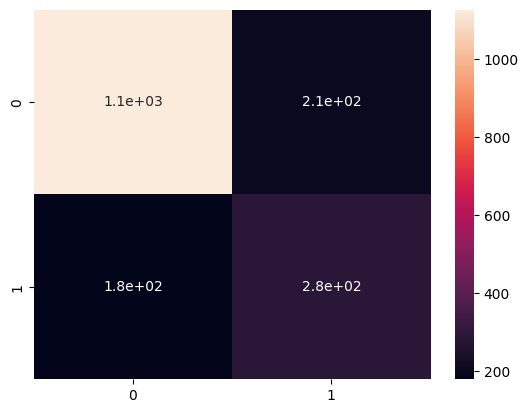

In [85]:
best_model =  aml.get_best_model(criterion="mean_per_class_error")
X_test_h2o = h2o.H2OFrame.from_python(X_test)
y_pred = best_model.predict(X_test_h2o)
y_pred = y_pred.as_data_frame()['predict'].values
cf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cf, annot=True);